In [5]:
import numpy as np
import h5py
import torch

path = r'C:\Users\s174370\Desktop\magfield-prediction\data\bnd_256\magfield_256_large.h5'
imgh5 = h5py.File(path)

c:\Users\s174370\AppData\Local\miniconda3\envs\dgm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
img = imgh5['field']

print(imgh5['field'].shape[0])



5000


In [36]:
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as col
import kornia
import torch

B = np.load(r'C:\Users\s174370\Desktop\magfield-prediction\data\paper_256\0.npy')

print(np.shape(B))

(3, 256, 256, 3)


(3, 256, 256, 3)
(3, 256, 256)
(3, 256, 256)


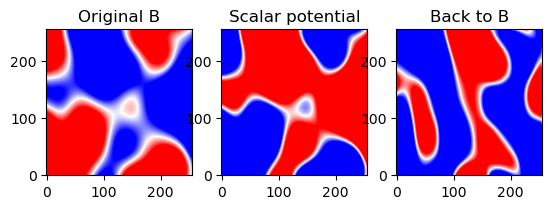

In [72]:
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(131)  # left side
ax2 = fig.add_subplot(132)  # right side
ax3 = fig.add_subplot(133)
ascent = torch.from_numpy(B)
print(np.shape(B))
Bx = -scipy.integrate.simps(ascent)#-scipy.integrate.simps(B) 
#By = -scipy.integrate.simps(ascent[:,:,:,1])#-scipy.integrate.simps(B) 
#Bz = -scipy.integrate.simps(ascent[:,:,:,2])#-scipy.integrate.simps(B) 
print(np.shape(Bx))
#print(np.shape(By))
#print(np.shape(Bz))
#result = torch.cat((Bx,By,Bz),-1)
result = Bx
print(np.shape(result))
reverse = -ndimage.sobel(result) #- kornia.filters.sobel(torch.unsqueeze(result,3)) #-ndimage.sobel(result) 
ax1.imshow(ascent[0,:,:,0], cmap='bwr', norm=col.Normalize(vmin=-0.04, vmax=0.04), origin="lower")
ax2.imshow(result[0,:,:], cmap='bwr', norm=col.Normalize(vmin=-0.04, vmax=0.04), origin="lower")
ax3.imshow(reverse[0,:,:], cmap='bwr', norm=col.Normalize(vmin=-0.04, vmax=0.04), origin="lower")
ax1.title.set_text('Original B')
ax2.title.set_text('Scalar potential')
ax3.title.set_text('Back to B')
plt.show()
